<a href="https://colab.research.google.com/github/ketbogale/AI-data-processing/blob/main/Computer_vision_and_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction to Computer Vision

Computer vision is a field of artificial intelligence that enables computers to "see", identify and process images and videos in the same way that human vision does. It involves methods for acquiring, processing, analyzing, and understanding digital images, and extracting high-dimensional data from the real world in order to produce numerical or symbolic information, e.g., in the forms of decisions.

Some common applications of computer vision include:

*   **Image Recognition:** Identifying objects, people, text, etc. in images.
*   **Object Detection:** Locating instances of objects in images or videos.
*   **Image Segmentation:** Dividing an image into regions or segments.
*   **Facial Recognition:** Identifying and verifying individuals based on their faces.
*   **Medical Imaging Analysis:** Assisting in diagnosing diseases from medical scans.
*   **Autonomous Vehicles:** Enabling cars to perceive their surroundings.
*   **Augmented Reality:** Overlaying digital information onto the real world.

### Essential Libraries for Computer Vision and Image Processing

Here are some of the key libraries you'll likely use for computer vision and image processing in Python:

*   **OpenCV (cv2):** This is arguably the most widely used library for computer vision tasks. It provides a comprehensive set of functions for image and video analysis, including operations like reading and writing images, manipulating pixels, filtering, object detection, and much more.
*   **Pillow (PIL Fork):** Pillow is a powerful image processing library that's a fork of the original Python Imaging Library (PIL). It's great for basic image manipulations like resizing, cropping, rotating, color conversions, and working with different image formats.
*   **NumPy:** While not exclusively a computer vision library, NumPy is fundamental for numerical operations in Python and is heavily used in computer vision for handling image data as arrays.
*   **Matplotlib:** This is a popular plotting library that's essential for visualizing images, plots, and results in computer vision projects.
*   **Scikit-image:** This library provides a collection of algorithms for image processing, including segmentation, feature detection, and image analysis.
*   **TensorFlow and PyTorch:** These are deep learning frameworks that are widely used for more advanced computer vision tasks like building and training convolutional neural networks (CNNs) for image recognition, object detection, and other complex problems.

We'll be primarily using **OpenCV** and **Matplotlib** as we go through the examples in this introduction.

Saving challenge.jpg to challenge (3).jpg
Uploaded file: challenge (3).jpg


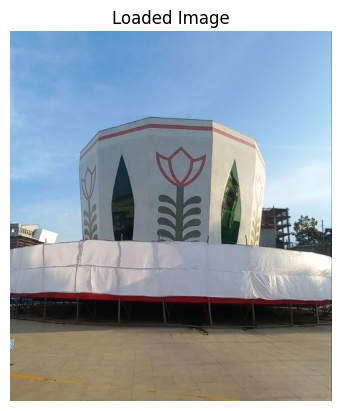

In [44]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files
import io
import numpy as np # Import numpy

# Use files.upload() to upload an image
uploaded = files.upload()

# Check if a file was uploaded
if len(uploaded) > 0:
    # Get the filename of the uploaded file
    image_filename = next(iter(uploaded))
    print(f"Uploaded file: {image_filename}")

    # Read the image using OpenCV
    # OpenCV reads images from a numpy array
    img = cv2.imdecode(np.frombuffer(uploaded[image_filename], np.uint8), cv2.IMREAD_COLOR)

    # Check if the image was loaded successfully
    if img is None:
        print(f"Error: Could not load image from {image_filename}. Please ensure it's a valid image file.")
    else:
        # Display the image
        # OpenCV reads images in BGR format, Matplotlib displays in RGB
        # So, we convert BGR to RGB
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.title('Loaded Image')
        plt.axis('off') # Hide axis values
        plt.show()
else:
    print("No file uploaded. Please upload an image file.")

### Working with Pixels

Images are represented as arrays, allowing us to access and modify individual pixel values.

### Image Filtering

Image filtering is a process that modifies or enhances an image by applying a mathematical operation to each pixel based on the values of its surrounding pixels. This is often done using a **convolutional filter** (also known as a kernel or mask).

A convolutional filter is a small matrix that is slid over the image. At each pixel, the filter's values are multiplied by the corresponding pixel values in the image that are covered by the filter, and the results are summed up to get the new value for the central pixel.

Here's a simple illustration of a 3x3 filter being applied to a pixel:

### Common Filtering Operations with OpenCV

OpenCV provides several built-in functions for applying common image filters. Let's explore a few:

#### 1. Averaging (Blurring)

Averaging is a simple blurring technique where the value of each pixel is replaced by the average of its neighbors within the filter window. This is useful for reducing noise.

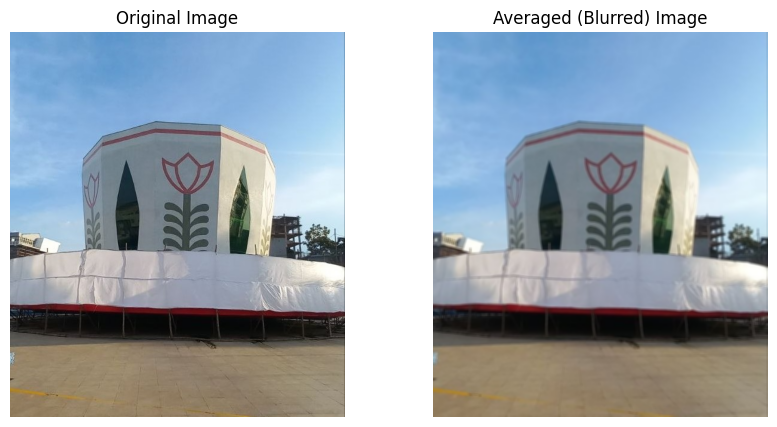

In [45]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'img' is loaded from the previous steps
# If not, make sure to load your image here

if img is None:
    print("Error: Image not loaded. Please load an image first.")
else:
    # Apply averaging filter
    # The kernel size (e.g., (5, 5)) determines the amount of blurring
    averaged_img = cv2.blur(img, (5, 5))

    # Display the original and averaged images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(averaged_img, cv2.COLOR_BGR2RGB))
    plt.title('Averaged (Blurred) Image')
    plt.axis('off')

    plt.show()

#### 2. Gaussian Blurring

Gaussian blurring is another common blurring technique that uses a Gaussian function to weigh the neighboring pixels, giving more importance to pixels closer to the center. This often produces a smoother blur than simple averaging.

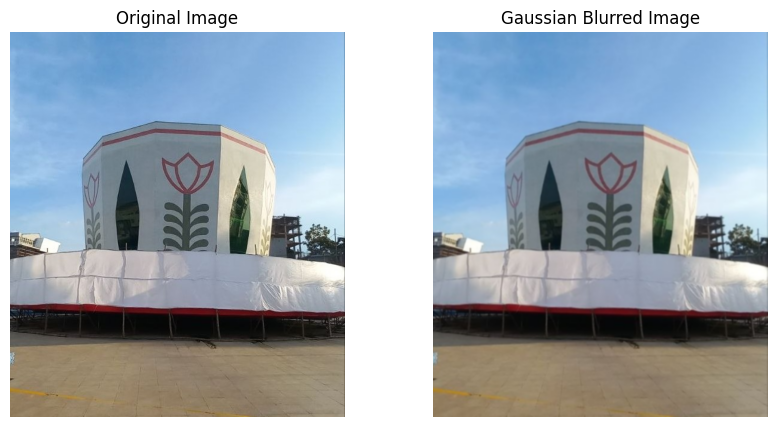

In [46]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'img' is loaded from the previous steps
# If not, make sure to load your image here

if img is None:
    print("Error: Image not loaded. Please load an image first.")
else:
    # Apply Gaussian blur
    # The kernel size (e.g., (5, 5)) and standard deviation (0) affect the blurring
    gaussian_blurred_img = cv2.GaussianBlur(img, (5, 5), 0)

    # Display the original and Gaussian blurred images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(gaussian_blurred_img, cv2.COLOR_BGR2RGB))
    plt.title('Gaussian Blurred Image')
    plt.axis('off')

    plt.show()

#### 3. Median Blurring

Median blurring replaces the central pixel value with the median of the pixel values in the filter window. This is particularly effective at removing salt-and-pepper noise.

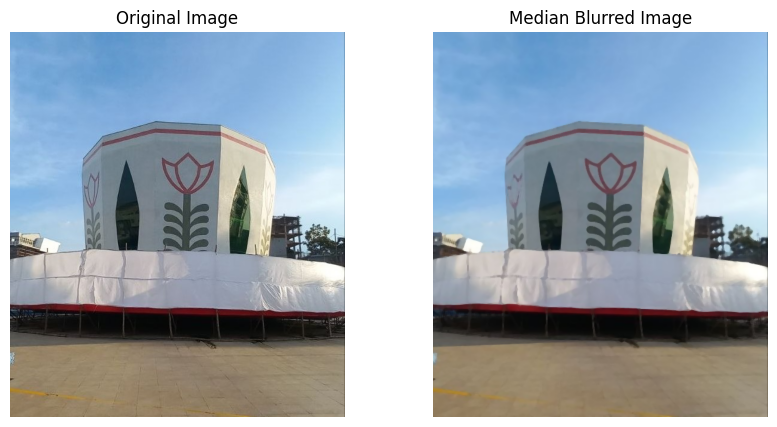

In [47]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'img' is loaded from the previous steps
# If not, make sure to load your image here

if img is None:
    print("Error: Image not loaded. Please load an image first.")
else:
    # Apply Median blur
    # The kernel size (e.g., 5) should be an odd number
    median_blurred_img = cv2.medianBlur(img, 5)

    # Display the original and Median blurred images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(median_blurred_img, cv2.COLOR_BGR2RGB))
    plt.title('Median Blurred Image')
    plt.axis('off')

    plt.show()

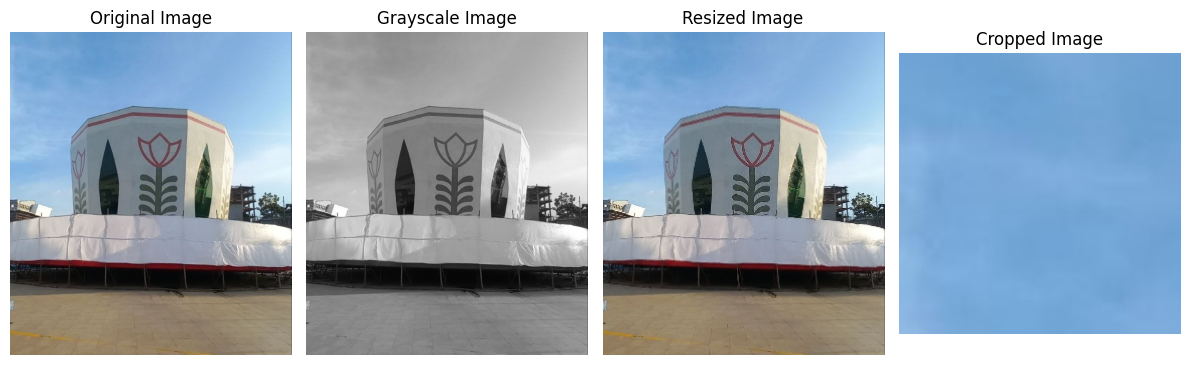

In [48]:
import cv2
import matplotlib.pyplot as plt

# Assuming you have uploaded an image and the 'img' variable is available from the previous cell
# If not, make sure to run the previous cell (where files.upload() is used) to load the image

if img is None:
    print("Error: Image not loaded. Please run the cell above to load an image.")
else:
    # 1. Convert to Grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 2. Resize the image
    # Let's resize it to half its original size
    resized_img = cv2.resize(img, (int(img.shape[1]*0.5), int(img.shape[0]*0.5)))

    # 3. Crop the image
    # Let's crop a region from the top-left corner (e.g., first 100x100 pixels)
    cropped_img = img[0:100, 0:100]

    # Display the original and processed images
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 4, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.imshow(gray_img, cmap='gray') # Use 'gray' colormap for grayscale
    plt.title('Grayscale Image')
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
    plt.title('Resized Image')
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
    plt.title('Cropped Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

In [49]:
import cv2

# Assuming you have the 'gray_img' variable from the previous steps
# If not, make sure to run the previous cell (where grayscale conversion was done) to create it

if 'gray_img' in globals():
    # Define the filename for the saved image
    output_filename_gray = 'grayscale_image.jpg'

    # Save the grayscale image
    success_gray = cv2.imwrite(output_filename_gray, gray_img)

    if success_gray:
        print(f"Grayscale image saved successfully as {output_filename_gray}")
    else:
        print(f"Error: Could not save image as {output_filename_gray}")

    # You can find the saved image in the files tab on the left sidebar
else:
    print("Error: gray_img not found. Please run the cell that converts the image to grayscale to create it.")

Grayscale image saved successfully as grayscale_image.jpg


In [39]:
import cv2

# Assuming you have the 'enhanced_inverted_img' variable from the previous steps
# If not, make sure to run the previous cells to create it

if 'enhanced_inverted_img' in globals():
    # Define the filename for the saved image
    output_filename = 'enhanced_inverted_image.jpg'

    # Save the enhanced image
    success = cv2.imwrite(output_filename, enhanced_inverted_img)

    if success:
        print(f"Enhanced image saved successfully as {output_filename}")
    else:
        print(f"Error: Could not save image as {output_filename}")

    # You can find the saved image in the files tab on the left sidebar
else:
    print("Error: enhanced_inverted_img not found. Please run the previous cell to create it.")

Enhanced image saved successfully as enhanced_inverted_image.jpg


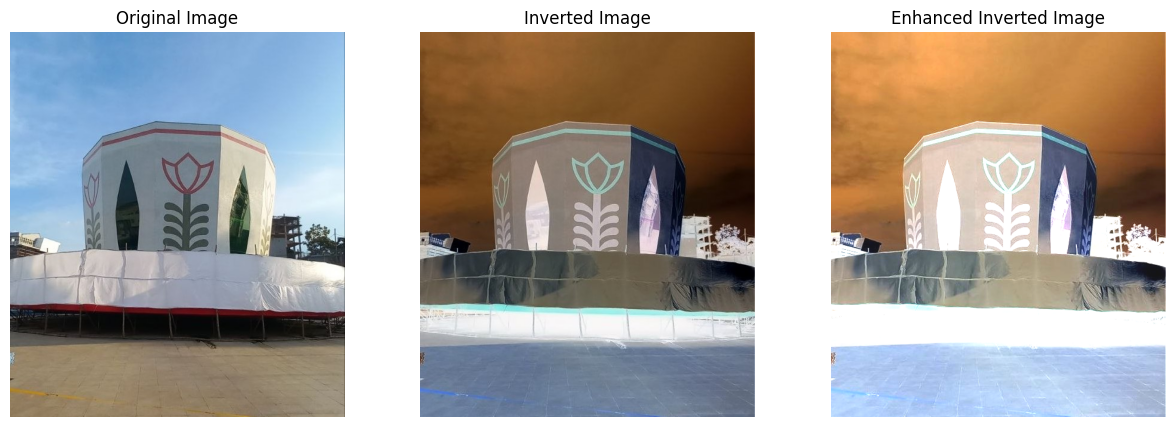

In [50]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have an image loaded in the variable 'img' from the previous steps
# If not, make sure to load your image here by running the previous cell:
# from google.colab import files
# uploaded = files.upload()
# if len(uploaded) > 0:
#     image_filename = next(iter(uploaded))
#     img = cv2.imdecode(np.frombuffer(uploaded[image_filename], np.uint8), cv2.IMREAD_COLOR)


if img is None:
    print("Error: Image not loaded. Please run the previous cell to load an image.")
else:
    # Invert the colors of the image
    inverted_img = 255 - img

    # --- Enhance the inverted image (Adjust brightness and contrast) ---
    # alpha controls the contrast (1.0-3.0)
    # beta controls the brightness (0-100)
    alpha = 1.5  # Adjust this value for contrast
    beta = 20    # Adjust this value for brightness

    enhanced_inverted_img = cv2.convertScaleAbs(inverted_img, alpha=alpha, beta=beta)
    # --- End of enhancement ---


    # Display the original, inverted, and enhanced inverted images
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(inverted_img, cv2.COLOR_BGR2RGB))
    plt.title('Inverted Image')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(enhanced_inverted_img, cv2.COLOR_BGR2RGB))
    plt.title('Enhanced Inverted Image')
    plt.axis('off')


    plt.show()

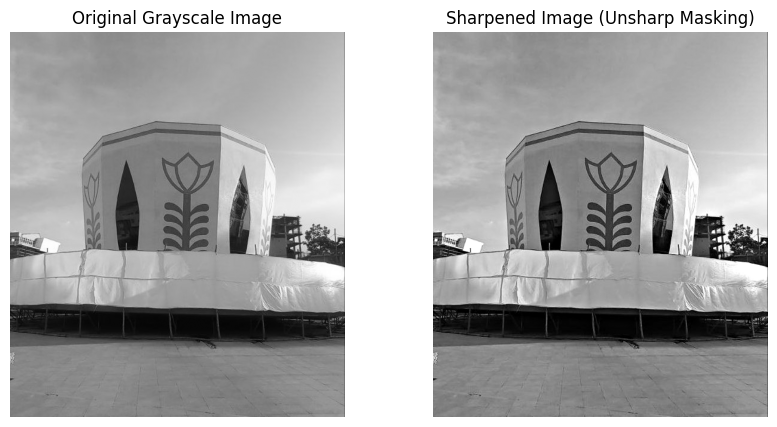

In [51]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'img' is loaded from the previous steps
# If not, make sure to load your image here

if img is None:
    print("Error: Image not loaded. Please load an image first.")
else:
    # Convert the image to grayscale for sharpening
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to the grayscale image (this is the 'unsharp' part)
    # The kernel size and standard deviation affect the blur
    blurred_img = cv2.GaussianBlur(gray_img, (0, 0), 10)

    # Apply weighted addition to sharpen the image
    # sharpened_img = original_img + (original_img - blurred_img) * amount
    # We use cv2.addWeighted for this
    # alpha: weight of the original image
    # beta: weight of the unsharp mask (original - blurred) - controls sharpening amount
    sharpened_img = cv2.addWeighted(gray_img, 1.5, blurred_img, -0.5, 0)

    # Display the original grayscale and sharpened images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(gray_img, cmap='gray')
    plt.title('Original Grayscale Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(sharpened_img, cmap='gray')
    plt.title('Sharpened Image (Unsharp Masking)')
    plt.axis('off')

    plt.show()

### Edge Detection

Edge detection is an image processing technique used to find the boundaries of objects within images. Edges are typically defined as points where the image brightness changes sharply or has discontinuities. Identifying edges is often a first step in many computer vision tasks, such as object recognition and image segmentation.

### Common Edge Detection Methods with OpenCV

OpenCV offers several functions for edge detection. Let's look at two widely used ones: the Sobel operator and the Canny edge detector.

#### 1. Sobel Operator

The Sobel operator is a differential operator that computes the approximations of the gradients of the image intensity function. It's often used to find edges in both the horizontal and vertical directions.

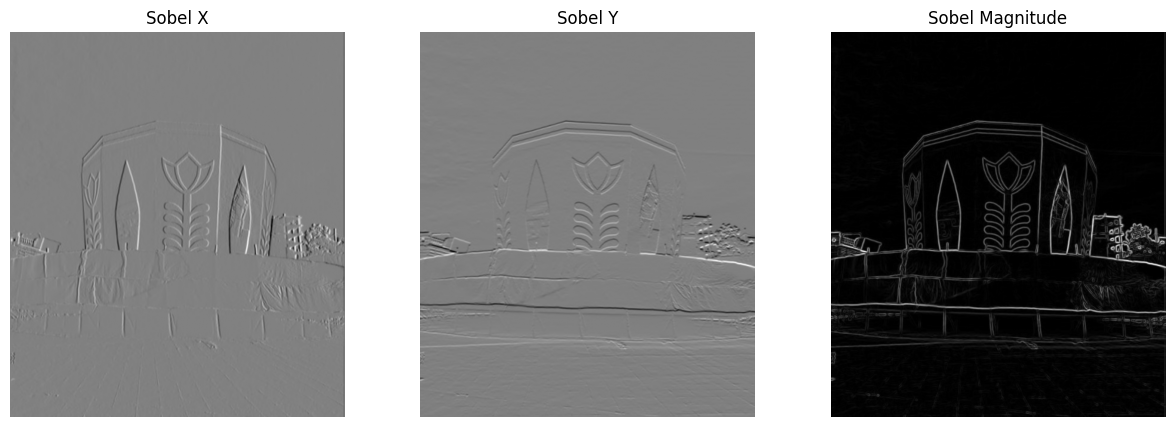

In [53]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'img' is loaded from the previous steps and is a color image
# If not, make sure to load your image here

if img is None:
    print("Error: Image not loaded. Please load an image first.")
else:
    # Convert the image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Sobel filter in the x direction
    # ddepth specifies the output image depth; cv2.CV_64F is used to avoid overflow
    # ksize is the size of the kernel (e.g., 3 for a 3x3 kernel)
    sobelx = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=5)

    # Apply Sobel filter in the y direction
    sobely = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=5)

    # Compute the magnitude of the gradients (approximating the total gradient)
    sobel_magnitude = np.sqrt(sobelx**2 + sobely**2)

    # Display the results
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(sobelx, cmap='gray')
    plt.title('Sobel X')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(sobely, cmap='gray')
    plt.title('Sobel Y')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(sobel_magnitude, cmap='gray')
    plt.title('Sobel Magnitude')
    plt.axis('off')

    plt.show()

#### 2. Canny Edge Detector

The Canny edge detector is a multi-stage algorithm that is widely considered one of the optimal edge detection methods. It's less susceptible to noise and can detect true weak edges.

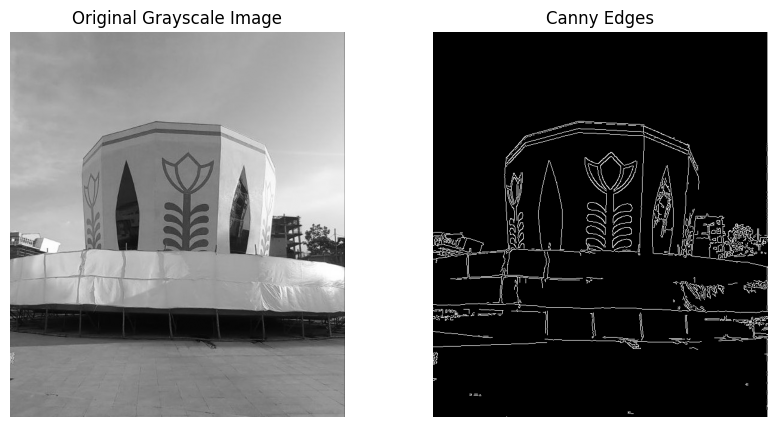

In [55]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'img' is loaded from the previous steps and is a color image
# If not, make sure to load your image here

if img is None:
    print("Error: Image not loaded. Please load an image first.")
else:
    # Convert the image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detector
    # The two arguments after the image are the minimum and maximum threshold values.
    # Edges with intensity gradients greater than the max_threshold are sure edges.
    # Edges with intensity gradients less than the min_threshold are discarded.
    # Edges with intensity gradients between the two thresholds are classified
    # as edges if they are connected to sure edges.
    canny_edges = cv2.Canny(gray_img, 100, 200)

    # Display the original grayscale and Canny edges
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(gray_img, cmap='gray')
    plt.title('Original Grayscale Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(canny_edges, cmap='gray')
    plt.title('Canny Edges')
    plt.axis('off')

    plt.show()

### Image Segmentation

Image segmentation is the process of partitioning a digital image into multiple segments (sets of pixels, also known as superpixels). The goal is to simplify and/or change the representation of an image into something that is more meaningful and easier to analyze.

### Thresholding

Thresholding is a simple and effective segmentation technique that converts a grayscale image into a binary image based on a threshold value. Pixels with intensity values above the threshold are assigned one value (e.g., white), and pixels below the threshold are assigned another value (e.g., black).

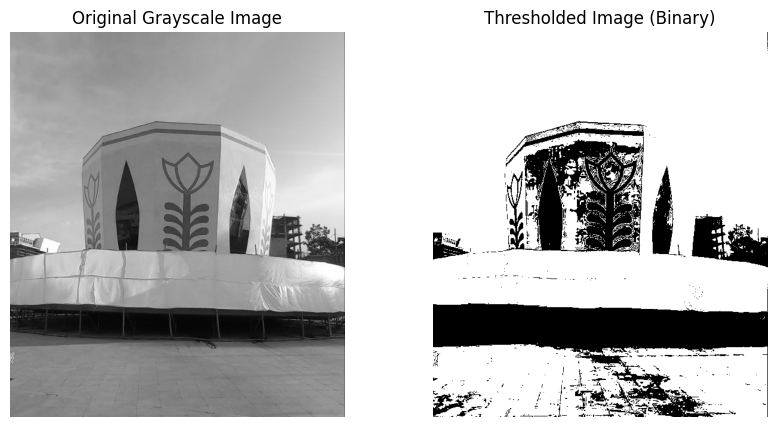

In [56]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'img' is loaded from the previous steps and is a color image
# If not, make sure to load your image here

if img is None:
    print("Error: Image not loaded. Please load an image first.")
else:
    # Convert the image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply simple thresholding
    # cv2.threshold returns two values:
    # 1. ret: the threshold value used
    # 2. thresh_img: the resulting thresholded image
    # We use cv2.THRESH_BINARY to create a binary image
    ret, thresh_img = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)

    # Display the original grayscale and thresholded images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(gray_img, cmap='gray')
    plt.title('Original Grayscale Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(thresh_img, cmap='gray')
    plt.title('Thresholded Image (Binary)')
    plt.axis('off')

    plt.show()

### Adaptive Thresholding

Simple thresholding uses a global threshold value for the entire image. Adaptive thresholding, on the other hand, calculates the threshold for small regions of the image separately. This can be more effective in images with varying lighting conditions.

### Contour Detection

Contour detection is a technique to find the boundaries of objects in an image. Contours are essentially curves joining all the continuous points (along the boundary), having the same color or intensity. They are a useful tool for shape analysis, object recognition, and object detection.

### Finding and Drawing Contours with OpenCV

OpenCV provides functions to find and draw contours. We typically work with binary images (like the ones we got from thresholding) when finding contours.

In [59]:
import cv2
import numpy as np

# Assuming 'contours' are available from the previous contour detection step
# If not, make sure to run the contour detection cell first to create them.

if 'contours' in globals() and len(contours) > 0:
    print("Calculating area and perimeter for detected contours:")
    for i, contour in enumerate(contours):
        # Calculate the area of the contour
        area = cv2.contourArea(contour)

        # Calculate the perimeter of the contour
        # The second argument (True) specifies that the contour is closed
        perimeter = cv2.arcLength(contour, True)

        print(f"Contour {i+1}: Area = {area:.2f}, Perimeter = {perimeter:.2f}")
else:
    print("No contours found or 'contours' variable not available. Please run the contour detection cell first.")

Calculating area and perimeter for detected contours:
Contour 1: Area = 0.00, Perimeter = 4.00
Contour 2: Area = 0.00, Perimeter = 2.00
Contour 3: Area = 0.00, Perimeter = 0.00
Contour 4: Area = 0.00, Perimeter = 0.00
Contour 5: Area = 0.00, Perimeter = 2.00
Contour 6: Area = 0.00, Perimeter = 0.00
Contour 7: Area = 6.00, Perimeter = 22.83
Contour 8: Area = 0.00, Perimeter = 0.00
Contour 9: Area = 0.00, Perimeter = 0.00
Contour 10: Area = 0.00, Perimeter = 0.00
Contour 11: Area = 0.00, Perimeter = 0.00
Contour 12: Area = 1.00, Perimeter = 13.66
Contour 13: Area = 0.00, Perimeter = 0.00
Contour 14: Area = 0.50, Perimeter = 3.41
Contour 15: Area = 2.00, Perimeter = 6.83
Contour 16: Area = 0.00, Perimeter = 0.00
Contour 17: Area = 1.00, Perimeter = 4.00
Contour 18: Area = 0.00, Perimeter = 0.00
Contour 19: Area = 1.50, Perimeter = 5.41
Contour 20: Area = 3.50, Perimeter = 7.41
Contour 21: Area = 0.00, Perimeter = 2.00
Contour 22: Area = 0.00, Perimeter = 0.00
Contour 23: Area = 0.00, Peri

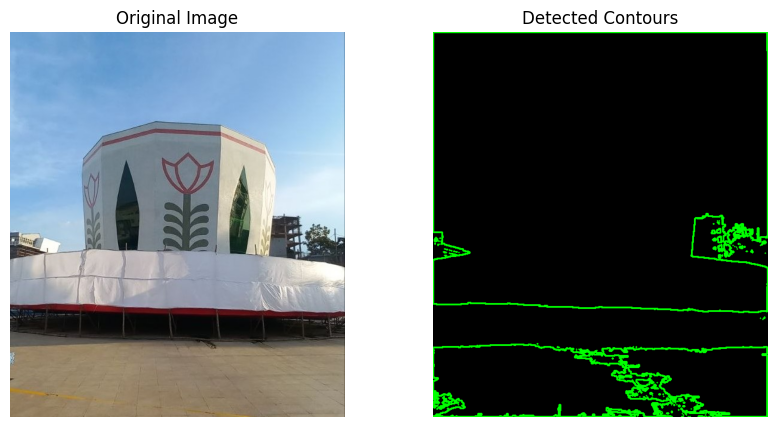

Number of contours found: 147


In [58]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'thresh_img' is available from the previous thresholding steps
# If not, make sure to run the thresholding cells first to create it.
# For this example, let's re-create a simple thresholded image from the original 'img'
# Make sure 'img' is loaded from the initial steps

if 'img' not in globals() or img is None:
    print("Error: Original image 'img' not loaded. Please load an image first.")
elif 'thresh_img' not in globals():
     print("Error: Thresholded image 'thresh_img' not found. Running thresholding first.")
     # Convert to grayscale and apply simple thresholding
     gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
     ret, thresh_img = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)


if 'thresh_img' in globals():
    # Find contours in the thresholded image
    # cv2.findContours returns a list of contours and their hierarchy
    # cv2.RETR_EXTERNAL retrieves only the extreme outer contours
    # cv2.CHAIN_APPROX_SIMPLE compresses horizontal, vertical, and diagonal segments
    contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a blank image to draw contours on
    # We'll draw contours on a color image for better visualization
    contour_img = np.zeros_like(img) # Create a black image with the same dimensions as the original

    # Draw the detected contours on the blank image
    # -1 means draw all contours
    # (0, 255, 0) is the color (green in BGR)
    # 2 is the thickness of the contour lines
    cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 2)

    # Display the original and contour images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    # Convert contour_img to RGB for displaying with matplotlib
    plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
    plt.title('Detected Contours')
    plt.axis('off')

    plt.show()

    print(f"Number of contours found: {len(contours)}")
else:
    print("Could not proceed with contour detection as thresholded image is not available.")

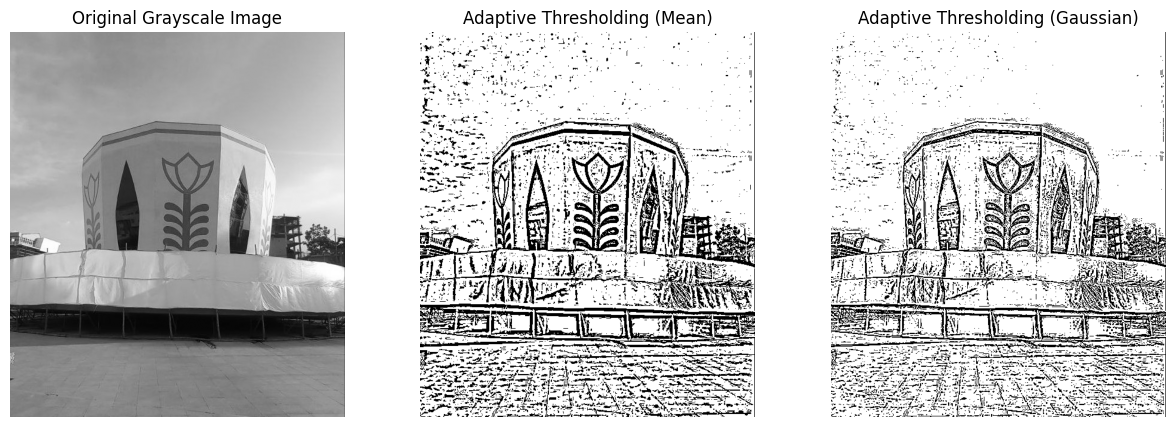

In [57]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'img' is loaded from the previous steps and is a color image
# If not, make sure to load your image here

if img is None:
    print("Error: Image not loaded. Please load an image first.")
else:
    # Convert the image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply adaptive thresholding
    # cv2.ADAPTIVE_THRESH_MEAN_C: threshold value is the mean of the neighborhood area
    # cv2.ADAPTIVE_THRESH_GAUSSIAN_C: threshold value is a weighted sum (Gaussian) of the neighborhood values
    # cv2.THRESH_BINARY: the type of thresholding applied
    # 11: Block Size - size of the neighborhood area (should be an odd number)
    # 2: C - a constant subtracted from the mean or weighted mean
    adaptive_thresh_mean = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
    adaptive_thresh_gaussian = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)


    # Display the original grayscale and adaptive thresholded images
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(gray_img, cmap='gray')
    plt.title('Original Grayscale Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(adaptive_thresh_mean, cmap='gray')
    plt.title('Adaptive Thresholding (Mean)')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(adaptive_thresh_gaussian, cmap='gray')
    plt.title('Adaptive Thresholding (Gaussian)')
    plt.axis('off')

    plt.show()

In [43]:
import cv2

# Assuming you have the 'sharpened_img' variable from the previous steps
# If not, make sure to run the previous cell (where sharpening was done) to create it

if 'sharpened_img' in globals():
    # Define the filename for the saved image
    output_filename_sharpened = 'sharpened_image.jpg'

    # Save the sharpened image
    success_sharpened = cv2.imwrite(output_filename_sharpened, sharpened_img)

    if success_sharpened:
        print(f"Sharpened image saved successfully as {output_filename_sharpened}")
    else:
        print(f"Error: Could not save image as {output_filename_sharpened}")

    # You can find the saved image in the files tab on the left sidebar
else:
    print("Error: sharpened_img not found. Please run the cell that applies sharpening to create it.")

Sharpened image saved successfully as sharpened_image.jpg
